In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
  print(torch.cuda.current_device())
  print(torch.cuda.device(0))
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))
else:
  print("No NVIDIA driver found. Using CPU")

0
1
NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Define the colorization model
class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=4, dilation=2)
        self.conv4 = nn.Conv2d(128, 3, kernel_size=5, stride=1, padding=4, dilation=2)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.relu(self.conv3(x))
        x = torch.sigmoid(self.conv4(x))
        return x

In [5]:
model = ColorizationNet().to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert RGB image to grayscale
def rgb_to_gray(img):
    return img.mean(dim=1, keepdim=True)


In [6]:
# Training loop
EPOCHS = 30
for epoch in range(EPOCHS):
    for i, (images, _) in enumerate(train_loader):
        # Move images to the GPU
        grayscale_images = rgb_to_gray(images).to(device)
        images = images.to(device)

        # Forward pass
        outputs = model(grayscale_images)
        loss = criterion(outputs, images)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

print("Finished Training")


Epoch [1/30], Step [1/782], Loss: 0.0673
Epoch [1/30], Step [101/782], Loss: 0.0106
Epoch [1/30], Step [201/782], Loss: 0.0066
Epoch [1/30], Step [301/782], Loss: 0.0050
Epoch [1/30], Step [401/782], Loss: 0.0052
Epoch [1/30], Step [501/782], Loss: 0.0065
Epoch [1/30], Step [601/782], Loss: 0.0046
Epoch [1/30], Step [701/782], Loss: 0.0038
Epoch [2/30], Step [1/782], Loss: 0.0047
Epoch [2/30], Step [101/782], Loss: 0.0082
Epoch [2/30], Step [201/782], Loss: 0.0049
Epoch [2/30], Step [301/782], Loss: 0.0057
Epoch [2/30], Step [401/782], Loss: 0.0045
Epoch [2/30], Step [501/782], Loss: 0.0053
Epoch [2/30], Step [601/782], Loss: 0.0060
Epoch [2/30], Step [701/782], Loss: 0.0053
Epoch [3/30], Step [1/782], Loss: 0.0078
Epoch [3/30], Step [101/782], Loss: 0.0045
Epoch [3/30], Step [201/782], Loss: 0.0060
Epoch [3/30], Step [301/782], Loss: 0.0051
Epoch [3/30], Step [401/782], Loss: 0.0050
Epoch [3/30], Step [501/782], Loss: 0.0058
Epoch [3/30], Step [601/782], Loss: 0.0041
Epoch [3/30], Ste

In [6]:
# Training loop
EPOCHS = 30
for epoch in range(EPOCHS):
    for i, (images, _) in enumerate(train_loader):
        grayscale_images = rgb_to_gray(images).to(device)
        images = images.to(device)

        # Forward pass

        outputs = model(grayscale_images)
        loss = criterion(outputs, images)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

print("Finished Training")


Epoch [1/30], Step [1/782], Loss: 0.0679
Epoch [1/30], Step [101/782], Loss: 0.0084
Epoch [1/30], Step [201/782], Loss: 0.0056
Epoch [1/30], Step [301/782], Loss: 0.0042
Epoch [1/30], Step [401/782], Loss: 0.0052
Epoch [1/30], Step [501/782], Loss: 0.0069
Epoch [1/30], Step [601/782], Loss: 0.0047
Epoch [1/30], Step [701/782], Loss: 0.0047
Epoch [2/30], Step [1/782], Loss: 0.0054
Epoch [2/30], Step [101/782], Loss: 0.0061
Epoch [2/30], Step [201/782], Loss: 0.0053
Epoch [2/30], Step [301/782], Loss: 0.0039
Epoch [2/30], Step [401/782], Loss: 0.0049
Epoch [2/30], Step [501/782], Loss: 0.0054
Epoch [2/30], Step [601/782], Loss: 0.0047
Epoch [2/30], Step [701/782], Loss: 0.0048
Epoch [3/30], Step [1/782], Loss: 0.0060
Epoch [3/30], Step [101/782], Loss: 0.0043
Epoch [3/30], Step [201/782], Loss: 0.0060
Epoch [3/30], Step [301/782], Loss: 0.0040
Epoch [3/30], Step [401/782], Loss: 0.0048
Epoch [3/30], Step [501/782], Loss: 0.0045
Epoch [3/30], Step [601/782], Loss: 0.0053
Epoch [3/30], Ste

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # Convert from Tensor image and display
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    if len(img.shape) == 2:  # grayscale image
        plt.imshow(npimg, cmap='gray')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualize_all_three(original_images, grayscale_images, colorized_images, n=5):
    """
    Display grayscale, colorized, and original images side by side.
    n: number of images to display from the batch
    """
    fig = plt.figure(figsize=(3*n, 4))
    for i in range(n):
        # Display original image
        ax = plt.subplot(1, 3*n, 3*i + 1)
        imshow(original_images[i])
        ax.set_title("Original")
        ax.axis("off")

        # Display original grayscale image
        ax = plt.subplot(1, 3*n, 3*i + 2)
        imshow(grayscale_images[i])
        ax.set_title("Grayscale")
        ax.axis("off")

        # Display colorized image
        ax = plt.subplot(1, 3*n, 3*i + 3)
        imshow(colorized_images[i])
        ax.set_title("Colorized")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


def torch_rgb_to_hsv(rgb):
    """
    Convert an RGB image tensor to HSV.

    Parameters:
    - rgb: tensor of shape (batch_size, 3, height, width) in RGB format in the range [0, 1].

    Returns:
    - hsv: tensor of same shape in HSV format in the range [0, 1].
    """
    r, g, b = rgb[:, 0, :, :], rgb[:, 1, :, :], rgb[:, 2, :, :]
    max_val, _ = torch.max(rgb, dim=1)
    min_val, _ = torch.min(rgb, dim=1)
    diff = max_val - min_val

    # Compute H
    h = torch.zeros_like(r)
    mask = (max_val == r) & (g >= b)
    h[mask] = (g[mask] - b[mask]) / diff[mask]
    mask = (max_val == r) & (g < b)
    h[mask] = (g[mask] - b[mask]) / diff[mask] + 6.0
    mask = max_val == g
    h[mask] = (b[mask] - r[mask]) / diff[mask] + 2.0
    mask = max_val == b
    h[mask] = (r[mask] - g[mask]) / diff[mask] + 4.0
    h = h / 6.0
    h[diff == 0.0] = 0.0

    # Compute S
    s = torch.zeros_like(r)
    s[diff != 0.0] = diff[diff != 0.0] / max_val[diff != 0.0]

    # V is just max_val
    v = max_val

    return torch.stack([h, s, v], dim=1)


def torch_hsv_to_rgb(hsv):
    """
    Convert an HSV image tensor to RGB.

    Parameters:
    - hsv: tensor of shape (batch_size, 3, height, width) in HSV format in the range [0, 1].

    Returns:
    - rgb: tensor of same shape in RGB format in the range [0, 1].
    """
    h, s, v = hsv[:, 0, :, :], hsv[:, 1, :, :], hsv[:, 2, :, :]
    i = (h * 6.0).floor()
    f = h * 6.0 - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))

    i_mod = i % 6
    r = torch.zeros_like(h)
    g = torch.zeros_like(h)
    b = torch.zeros_like(h)

    r[i_mod == 0.0] = v[i_mod == 0.0]
    g[i_mod == 0.0] = t[i_mod == 0.0]
    b[i_mod == 0.0] = p[i_mod == 0.0]

    r[i_mod == 1.0] = q[i_mod == 1.0]
    g[i_mod == 1.0] = v[i_mod == 1.0]
    b[i_mod == 1.0] = p[i_mod == 1.0]

    r[i_mod == 2.0] = p[i_mod == 2.0]
    g[i_mod == 2.0] = v[i_mod == 2.0]
    b[i_mod == 2.0] = t[i_mod == 2.0]

    r[i_mod == 3.0] = p[i_mod == 3.0]
    g[i_mod == 3.0] = q[i_mod == 3.0]
    b[i_mod == 3.0] = v[i_mod == 3.0]

    r[i_mod == 4.0] = t[i_mod == 4.0]
    g[i_mod == 4.0] = p[i_mod == 4.0]
    b[i_mod == 4.0] = v[i_mod == 4.0]

    r[i_mod == 5.0] = v[i_mod == 5.0]
    g[i_mod == 5.0] = p[i_mod == 5.0]
    b[i_mod == 5.0] = q[i_mod == 5.0]

    return torch.stack([r, g, b], dim=1)

def exaggerate_colors(images, saturation_factor=1.5, value_factor=1.2):
    """
    Exaggerate the colors of RGB images.

    Parameters:
    - images: tensor of shape (batch_size, 3, height, width) in RGB format.
    - saturation_factor: factor by which to increase the saturation. Default is 1.5.
    - value_factor: factor by which to increase the value/brightness. Default is 1.2.

    Returns:
    - color_exaggerated_images: tensor of same shape as input, with exaggerated colors.
    """
    # Convert images to the range [0, 1]
    images = (images + 1) / 2.0

    # Convert RGB images to HSV
    images_hsv = torch_rgb_to_hsv(images)

    # Increase the saturation and value components
    images_hsv[:, 1, :, :] = torch.clamp(images_hsv[:, 1, :, :] * saturation_factor, 0, 1)
    images_hsv[:, 2, :, :] = torch.clamp(images_hsv[:, 2, :, :] * value_factor, 0, 1)

    # Convert the modified HSV images back to RGB
    color_exaggerated_images = torch_hsv_to_rgb(images_hsv)

    # Convert images back to the range [-1, 1]
    color_exaggerated_images = color_exaggerated_images * 2.0 - 1.0

    return color_exaggerated_images



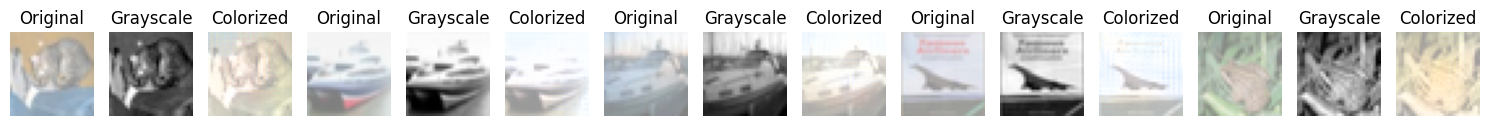

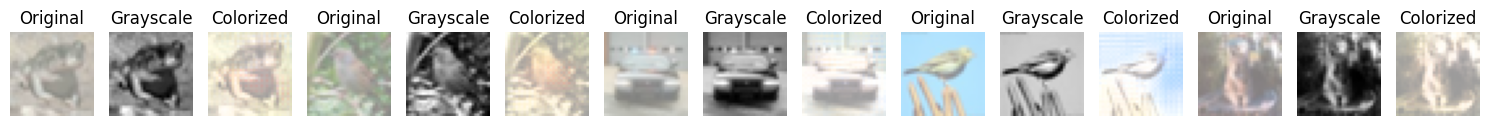

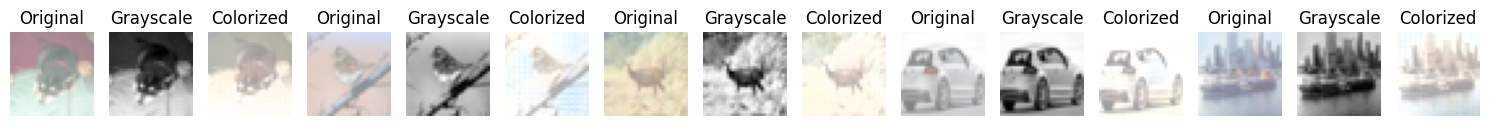

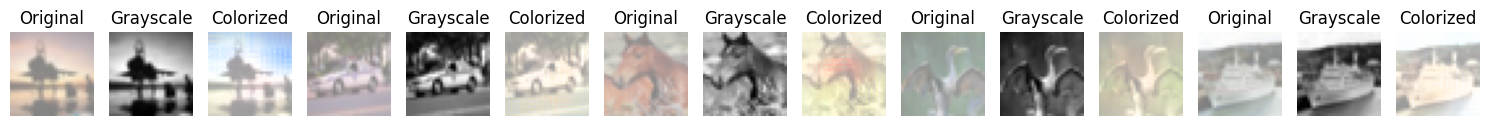

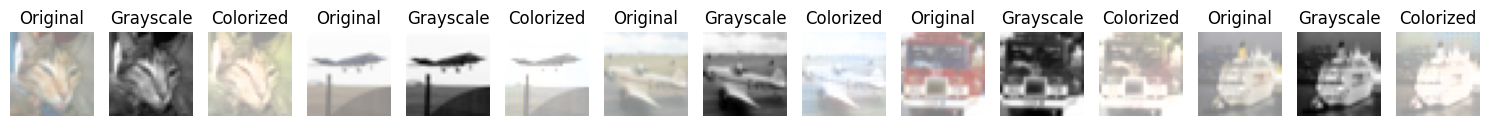

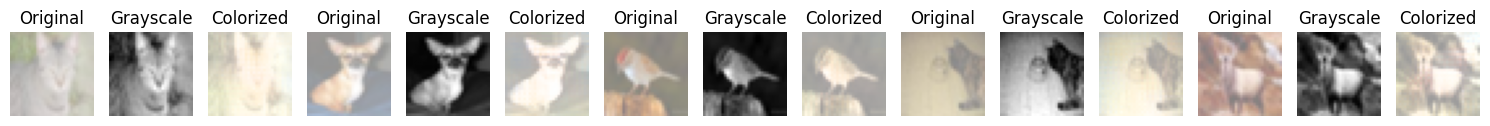

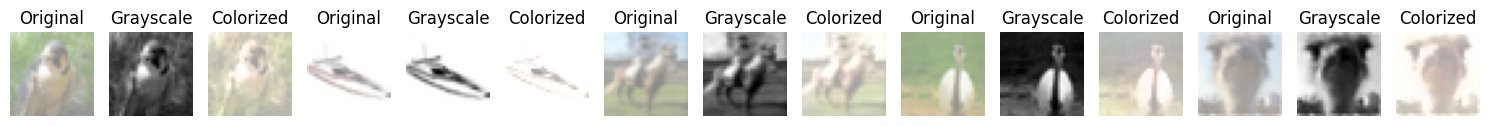

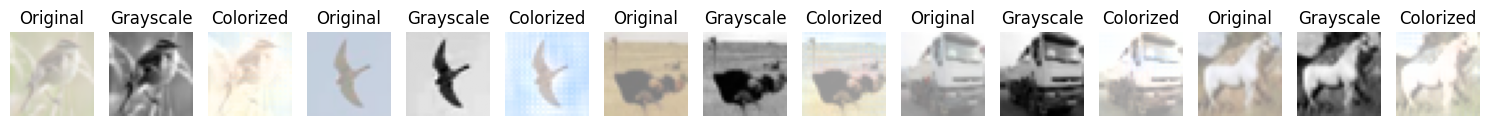

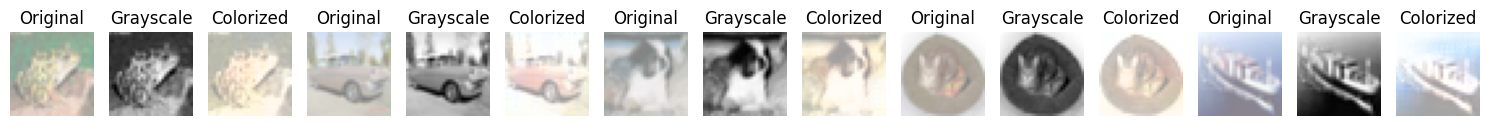

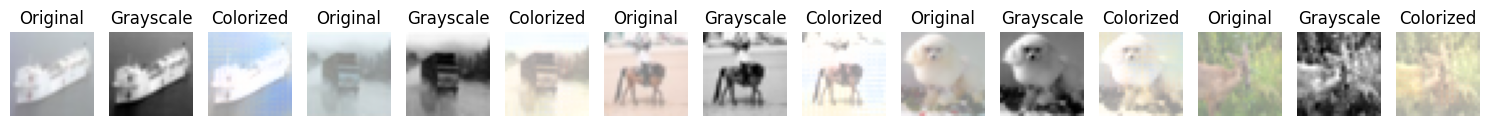

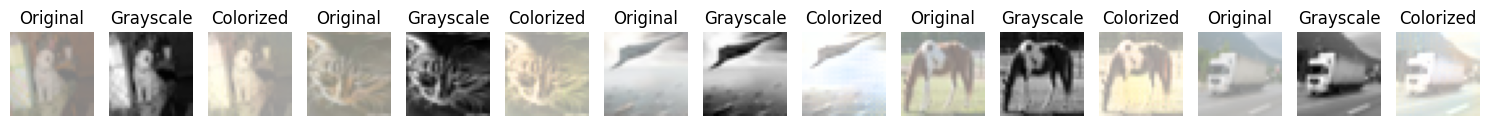

In [8]:
with torch.no_grad():
    for i, (images, _) in enumerate(test_loader):
        grayscale_images = rgb_to_gray(images).to(device)
        colorized_images = model(grayscale_images)


        grayscale_images_cpu = grayscale_images.cpu().squeeze(1)
        colorized_images_cpu = colorized_images.cpu()
        original_images_cpu = images.cpu()

        #colorized_images_cpu=scale_predicted_colors(colorized_images_cpu)
        colorized_images_cpu=exaggerate_colors(colorized_images_cpu)

        # Visualize the grayscale, colorized, and original images
        visualize_all_three(original_images_cpu, grayscale_images_cpu, colorized_images_cpu)

        if i == 10:  # only do this for up to certain batch for demonstration purposes
            break

In [9]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current working directory:", current_directory)


Current working directory: c:\Users\Tej Bachhav\OneDrive\Documents\GitHub\ImageColorisation


In [10]:
import ipywidgets as widgets
from IPython.display import display

# Create an upload widget
upload_widget = widgets.FileUpload(accept='*', multiple=True)

# Display the widget
display(upload_widget)

# Function to handle the uploaded files
def handle_upload(change):
    for filename, file_info in upload_widget.value.items():
        print("Uploaded file:", filename)

# Attach the handler to the widget
upload_widget.observe(handle_upload, names='value')


FileUpload(value=(), accept='*', description='Upload', multiple=True)

In [11]:
import os

# List all files in the current directory
files = os.listdir("c:/Users/Tej Bachhav/OneDrive/Documents/GitHub/ImageColorisation")
print("Files in the current directory:", files)


Files in the current directory: ['.git', '1.png', 'c.ipynb', 'Color.ipynb', 'colorization_model.pth', 'colorize-model2.pdf', 'colorize_model2.ipynb', 'colorize_model2.py', 'data', 'Effieltower.jpg', 'output.png', 'TASK2.ipynb', 'tasks.txt', '_colorized2.jpg']


In [12]:
from PIL import Image

# Open the image. (Keep your image in the current directory. In my case, the image was horse.jpg)
img = Image.open('Effieltower.jpg')

# Convert the image to grayscale
gray_img = img.convert("L")

In [13]:
import torchvision.transforms as transforms

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    # If you need to normalize, uncomment the following line
    # transforms.Normalize(mean=[0.5], std=[0.5])  # Assuming you want to normalize to [-1, 1] range
])



In [14]:
# Apply the transformations
img_tensor = transform(gray_img).unsqueeze(0)  # Add a batch dimension

# Ensure the model is in evaluation mode
model.eval()

# Move the image tensor to the device where your model is (likely 'cuda' if using GPU)
img_tensor = img_tensor.to(device)

# Get the model's output
with torch.no_grad():
    colorized_tensor = model(img_tensor)


In [15]:
# Convert the tensor back to an image
colorized_img = transforms.ToPILImage()(colorized_tensor.squeeze(0).cpu())

# Optionally, save the image
colorized_img.save("_colorized2.jpg")


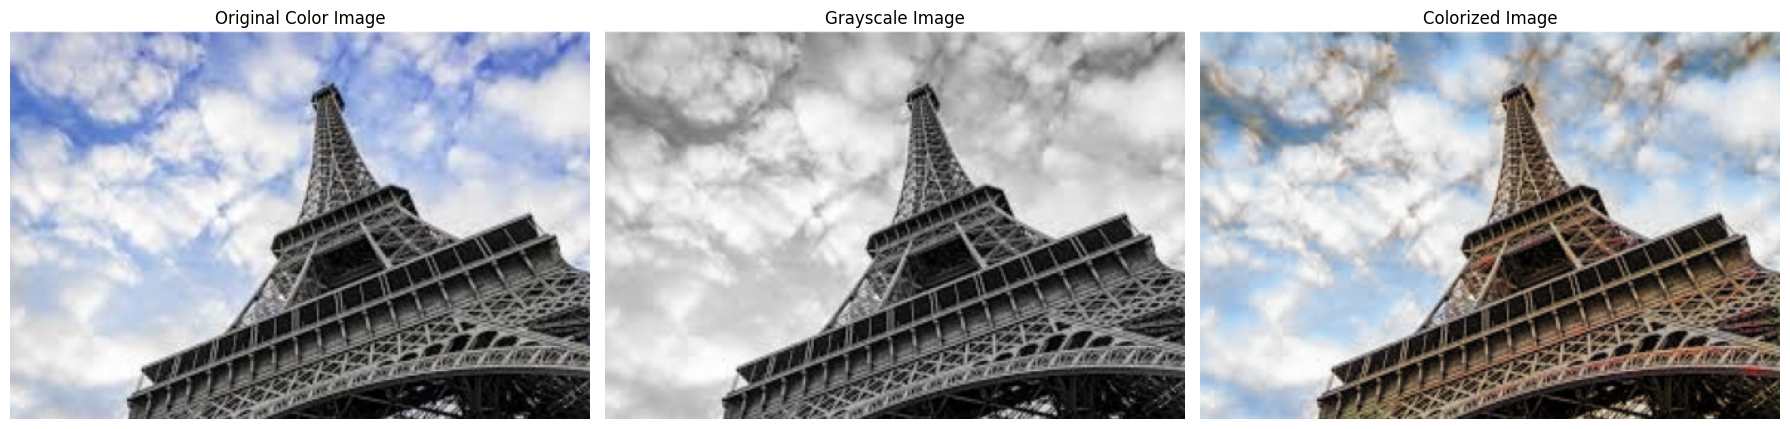

In [16]:
# Plotting the original, grayscale, and colorized images side-by-side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 1 row and 3 columns

# Display original color image
ax[0].imshow(img)
ax[0].set_title("Original Color Image")
ax[0].axis('off')  # Hide axes

# Display grayscale image
ax[1].imshow(gray_img, cmap='gray')  # Since it's grayscale, use cmap='gray'
ax[1].set_title("Grayscale Image")
ax[1].axis('off')  # Hide axes

# Display colorized image
ax[2].imshow(colorized_img)
ax[2].set_title("Colorized Image")
ax[2].axis('off')  # Hide axes

plt.tight_layout()  # Adjust spacing
plt.show()

FileUpload(value=(), accept='*', description='Upload', multiple=True)

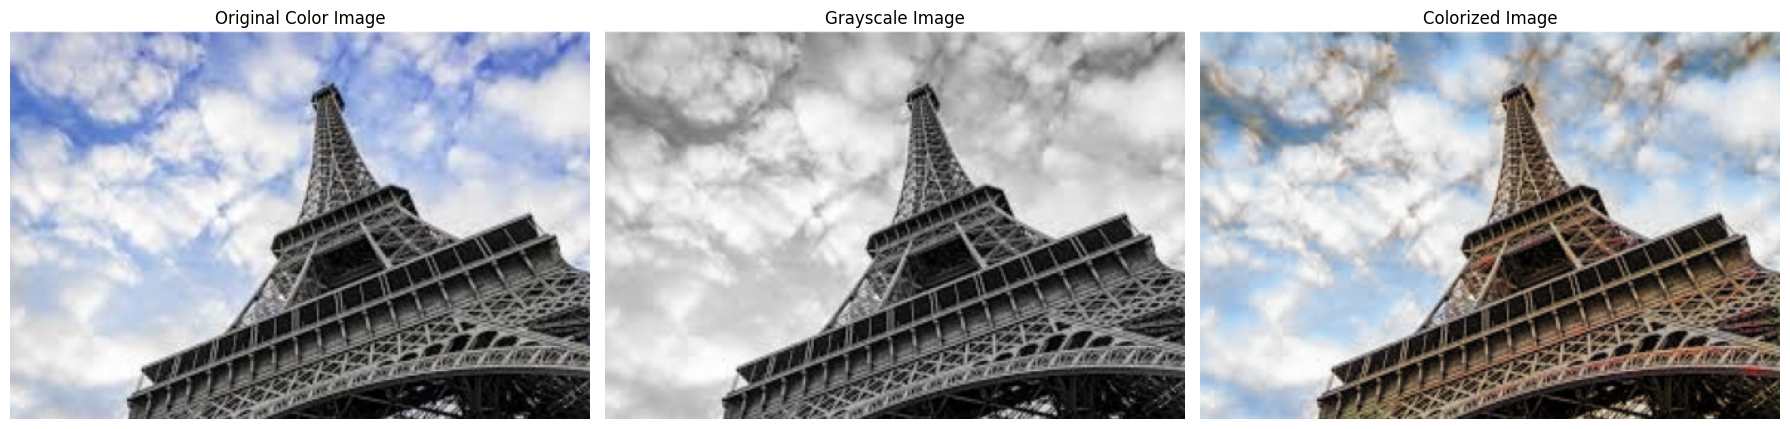

In [17]:
import ipywidgets as widgets
from IPython.display import display

# Create an upload widget
upload_widget = widgets.FileUpload(accept='*', multiple=True)

# Display the widget
display(upload_widget)

# Function to handle the uploaded files
def handle_upload(change):
    for filename, file_info in upload_widget.value.items():
        print("Uploaded file:", filename)

# Attach the handler to the widget
upload_widget.observe(handle_upload, names='value')

from PIL import Image

# Open the image. (Keep your image in the current directory. In my case, the image was horse.jpg)
img = Image.open('Effieltower.jpg')

# Convert the image to grayscale
gray_img = img.convert("L")

import torchvision.transforms as transforms

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    # If you need to normalize, uncomment the following line
    # transforms.Normalize(mean=[0.5], std=[0.5])  # Assuming you want to normalize to [-1, 1] range
])

# Apply the transformations
img_tensor = transform(gray_img).unsqueeze(0)  # Add a batch dimension

# Ensure the model is in evaluation mode
model.eval()

# Move the image tensor to the device where your model is (likely 'cuda' if using GPU)
img_tensor = img_tensor.to(device)

# Get the model's output
with torch.no_grad():
    colorized_tensor = model(img_tensor)

# Convert the tensor back to an image
colorized_img = transforms.ToPILImage()(colorized_tensor.squeeze(0).cpu())

# Optionally, save the image
colorized_img.save("_colorized2.jpg")

# Plotting the original, grayscale, and colorized images side-by-side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 1 row and 3 columns

# Display original color image
ax[0].imshow(img)
ax[0].set_title("Original Color Image")
ax[0].axis('off')  # Hide axes

# Display grayscale image
ax[1].imshow(gray_img, cmap='gray')  # Since it's grayscale, use cmap='gray'
ax[1].set_title("Grayscale Image")
ax[1].axis('off')  # Hide axes

# Display colorized image
ax[2].imshow(colorized_img)
ax[2].set_title("Colorized Image")
ax[2].axis('off')  # Hide axes

plt.tight_layout()  # Adjust spacing
plt.show()

In [76]:
# Save the model
model_path = os.path.join(current_directory, "colorization_model.pth")
torch.save(model.state_dict(), model_path)
print(f"Model saved to '{model_path}'")

Model saved to 'c:\Users\Tej Bachhav\OneDrive\Documents\GitHub\ImageColorisation\colorization_model.pth'


In [96]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Load the saved model
model_path = 'c:\\Users\\Tej Bachhav\\OneDrive\\Documents\\GitHub\\ImageColorisation\\colorization_model.pth'
loaded_model = ColorizationNet()
loaded_model.load_state_dict(torch.load(model_path))

# Ensure the model is in evaluation mode
loaded_model.eval()

print("Model loaded successfully")

Model loaded successfully


C:\Users\Tej Bachhav\AppData\Local\Temp\ipykernel_17336\2597793466.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_path))


In [28]:
# Define Perceptual Loss
class PerceptualLoss(nn.Module):
    def __init__(self, feature_extractor):
        super(PerceptualLoss, self).__init__()
        self.feature_extractor = feature_extractor
        self.criterion = nn.MSELoss()

    def forward(self, input, target):
        input_features = self.feature_extractor(rgb_to_gray(input))
        target_features = self.feature_extractor(rgb_to_gray(target))
        return self.criterion(input_features, target_features)

model.eval()

# Initialize the Perceptual Loss
perceptual_loss = PerceptualLoss(model)

# Function to train the model with a given loss function
def train_model(loss_function, epochs=30):
    model = ColorizationNet().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(epochs):
        for i, (images, _) in enumerate(train_loader):
            grayscale_images = rgb_to_gray(images).to(device)
            images = images.to(device)

            # Forward pass
            outputs = model(grayscale_images)
            loss = loss_function(outputs, images)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Print statistics
            if i % 100 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

    print("Finished Training")
    return model

# Train and compare models with different loss functions
print("Training with MSE Loss")
mse_model = train_model(nn.MSELoss())

print("Training with Perceptual Loss")
perceptual_model = train_model(perceptual_loss)

Training with MSE Loss
Epoch [1/30], Step [1/782], Loss: 0.0653
Epoch [1/30], Step [101/782], Loss: 0.0086
Epoch [1/30], Step [201/782], Loss: 0.0054
Epoch [1/30], Step [301/782], Loss: 0.0049
Epoch [1/30], Step [401/782], Loss: 0.0045
Epoch [1/30], Step [501/782], Loss: 0.0053
Epoch [1/30], Step [601/782], Loss: 0.0048
Epoch [1/30], Step [701/782], Loss: 0.0059
Epoch [2/30], Step [1/782], Loss: 0.0061
Epoch [2/30], Step [101/782], Loss: 0.0067
Epoch [2/30], Step [201/782], Loss: 0.0058
Epoch [2/30], Step [301/782], Loss: 0.0054
Epoch [2/30], Step [401/782], Loss: 0.0051
Epoch [2/30], Step [501/782], Loss: 0.0058
Epoch [2/30], Step [601/782], Loss: 0.0051
Epoch [2/30], Step [701/782], Loss: 0.0049
Epoch [3/30], Step [1/782], Loss: 0.0047
Epoch [3/30], Step [101/782], Loss: 0.0069
Epoch [3/30], Step [201/782], Loss: 0.0054
Epoch [3/30], Step [301/782], Loss: 0.0046
Epoch [3/30], Step [401/782], Loss: 0.0053
Epoch [3/30], Step [501/782], Loss: 0.0075
Epoch [3/30], Step [601/782], Loss: 0